In [ ]:
# colab'da ise tüm kütüphaneler neredeyse yüklü geliyor data science için, arkada linux makine çalıştırdığı için farklı kütüphaneler de yüklüyebiliyoruz 
# birçok kütüphane güncel geliyor update ve yüklemek için uğraşmıyoruz 
# 12 gb'lık var ram ve 100 gb harddislik bir makina veriyor bize 
# deep learning methodlarını gpu ile çalıştırırsak daha hızlı çalışıyor bize bunu sunuyor 
# tensorflow yükledikten sonra local'de grafik kartının da limitlerinden yararlanmak istiyorsak eğer tensorflow'un başka eklentileri var 
# ve onları da yüklemek gerekiyor windows makinelerde de sıkıntı çıkarıyor yüklemek hazır bir paket halinde vermemişler çünkü 


In [1]:
import tensorflow as tf 
print(tf.__version__)

# tensorflow'un kendi api'si olduğu gibi keras ile high level api tensorflow'un fonksiyonlarına daha kolay ulaşabileceğimiz bir arayüz ya da aracode diyebiliriz
# bu keras'dan istediğimiz araçları çekebiliyoruz 

2.4.0


In [3]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense # hidden layer'lar için 


In [4]:
from sklearn.datasets import load_boston # boston datasetini aldık sklearn içerisinden
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor  # regression problemi için bunu import ettik
import pandas as pd
from sklearn.model_selection import train_test_split # train ve test için import ettik
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neural_network import MLPClassifier # derin öğrenme ile sınıflandırma 
from sklearn.metrics import accuracy_score # doğruluk score'u
from sklearn.datasets import load_breast_cancer # meme kanseri verisini aldık

In [5]:
data = load_boston()
X = data["data"]
y = data["target"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3 )


In [6]:
model = Sequential([Dense(64,input_shape = (None,X.shape[1])),Dense(32),Dense(1)]) # boş bir model oluşturuyoruz, art arda katmanlar koymak için sequntial model kullanıyoruz 
# bir bakıma şu demek oluyor bir katmanın output'u diğer katmanın input'u olacak 
# Dense ise hidden_layer oluyor kendisinden önceki katmandaki nöronlar ile bağlantısı varsa Dense layer'lar oluyor, kaç tane nöron istiyorsak seçiyoruz 
# 2 katman oluşturuk 64 ve 32, 2 tane gizli katman 1 tane ise çıktı(output) katmanı
# bu şekilde bir architecture kurmak istiyorsak Dense layer'lardan oluşturmalıyız 
# girdi katmanı ise ilk Dense layer katmanı içinde input_shape olarak girmeliyiz satır sayısını None giriyoruz ama sütun sayısını girmeliyiz



In [35]:
model.compile(optimizer="adam",loss="mse",metrics=["mae","mape"]) 
# metric'leri kendimiz de oluşturabiliriz, 
# mape = yüzdelik hata değerlerini görmek istiyoruz, mae= mean absolute error 
# adam algoritmasını kullandık, optimizer = eniyileştirici
# https://www.tensorflow.org/api_docs/python/tf/keras/metrics

model.fit(X_train,y_train,epochs=5)
# epoch =zaman, yani 5 kez çalıştırmış olduk bunu arttırırsak daha fazla çalışmış olacak ve daha fazla öğrenecek diyebiliriz 
#  modelinizin örnek verileriniz üzerinde kaç kez eğitilmesi gerektiğini belirlersiniz 
#history = model.fit(X_train,y_train,epochs=5, verbose=0)
# bir çıktı olarakta alabiliyoruz, verbose 0 olarak verirsek çıktı dönmüyor 1 verirsek epochs sayısı kadar dönüyor, 2 dersek ise farklı şekilde veriyor

Epoch 1/5
12/12 [==============================] - 0s 3ms/step - loss: 16380.9776 - mae: 107.7528 - mape: 570.9830
Epoch 2/5
12/12 [==============================] - 0s 3ms/step - loss: 2534.5686 - mae: 44.1523 - mape: 218.1043
Epoch 3/5
12/12 [==============================] - 0s 3ms/step - loss: 546.2706 - mae: 19.7887 - mape: 100.7579
Epoch 4/5
12/12 [==============================] - 0s 3ms/step - loss: 353.5018 - mae: 14.8738 - mape: 88.3834
Epoch 5/5
12/12 [==============================] - 0s 3ms/step - loss: 175.6982 - mae: 10.4671 - mape: 48.4249


In [ ]:
# yukarıdaki code data sayısı az olduğu için çok hızlı çalıştı diyebiliriz
# loss fonksiyonu git gide azalıyor o da mean squared error'du, diğer parametreler de git gide azalıyor 

In [14]:
history = model.fit(X_train,y_train,epochs=100, verbose=0)

In [83]:
 #bunu dataframe'e çevirelim
 df = pd.DataFrame(history.history)
 df.head()

 # tüm parametreleri tek tek çekebiliyorum böylelikle 
 # bunları grafikte takip ederek 

,loss,mae,mape
0,39.824554,4.822027,24.318964
1,39.588573,4.822552,23.935658
2,38.421162,4.761825,23.386923
3,64.844437,6.411263,32.913120
4,39.800774,4.645207,23.302004


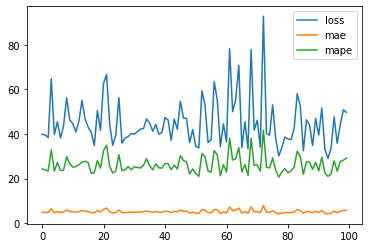

In [17]:
df.plot()
# grafik olarakta çizdirebiliriz 

In [7]:
model.summary()
# modelin özetini gösteriyor, 13+bias=14 - 14*64 =896'yı verir 896 parametremiz var 
# 65*32 ise 2080'i verir 
# son layer'da da 33 pametre var
# 3009 parametre var diyebiliriz

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, None, 64)          896       
_________________________________________________________________
dense_1 (Dense)              (None, None, 32)          2080      
_________________________________________________________________
dense_2 (Dense)              (None, None, 1)           33        
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


In [6]:
model = Sequential([Dense(1000,input_shape = (None,X.shape[1]), activation="relu"),
                    Dense(100, activation="relu"),
                    Dense(1)]) 
# parametreleri 1000 ve 100 yaparsak eğer
# hidden_layer'lar için activation fonksiyonunu default olarak relu veriyor
# Aktivasyon Fonksiyonları ; Linear için F(x) = x ,  Sigmoid için f(x) = 1/1+e'-x , 

# sigmoid fonksiyondan farkı ise  

# default olarak activation fonksiyonu linear fonksiyonu kullanıyor, non-linear fonksiyonlar için çalışmayacaktır 
# sigmoid biraz daha non-linear bir fonksiyon olduğu için onu kullandık 
# çıktı layerın'da sigmoid olmayacak çünkü 0 ile 1 olacak, o yüzden regression probleminde linear fonksiyonu kullanmış olacağız

# Relu f(x) = x, x>0       eğer değilse linear bir function oluyor
#             0, x<0      eğer 0'dan küçük ya da eşit ise 0 oluyor, 
# relu'ya bakacak olursak linear bir fonksiyonun türevi hep sabit sayıdır o yüzden türev hep sabit olacağı için öğrenme daha sabit olacaktır
# az da olsa non-linear'lik eliyoruz ve öğrenmeyi daha stabil hale getirmeye çalışıyoruz
# eskiden sigmoid kullanılıyordu daha çok ama şuan trend olan relu çünkü hidden_layer'larda öğrenme azalmasın diye 

In [24]:
# callbacks eklendikten sonra --
val_control = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=50) 
# vall_loss'u gözlemle diyoruz monitor ile
# patience 10 dediğimiz de 10 iterasyon boyunca herhangi bir iyileşme göstermiyorsa herhangi bir sayı da diyebiliriz iyileşmesine bağlı modelin
# demek ki validasyon datasında overfit oluyor diyeceğiz ve öğrenmeyi durdur diyeceğiz 
# callbacks=[val_control] ) callbacks burada her iterasyonda içerideki fonksiyonu çağıracak validasyon datasını izliyor 10 iterasyonda da bu fonksiyonu çağıracak
# eğer vall_loss'u izliyor ve iyileşmemişse train etmeyi yani öğrenmeyi durdur diyeceğiz

model.compile(optimizer="adam",loss="mse",metrics=["mae","mape"]) 
history = model.fit(X_train,y_train,epochs=1000, verbose=0, batch_size=500, 
                    validation_split=0.1, callbacks=[val_control] )

# batch_Size
# batch_size : her bir weight update ettiğimiz zaman 32'lik 32'lik yani farklı data'lar olduğunu düşünürsek, optimuma bazı datalar'da yaklaşırken 
# bazılarında dalgalanmalar oluyor, çünkü 32'lik alıyoruz ama batch_size'ı arttırsaydık daha smooth bir şekil çıkacaktı
# batch_size=100 ya da batch_size=32 

#validation_split - overfitting problem
#validation_split çoğu zaman 0.1 olur 
# modelin complex olması overfitting'e yol açar o yüzdeen tehlikeli 
# train datası üzerinde modeli fit ediyoruz ya %90'ı train için %10'u validation için ayıracak
# öğrenme ne kadar fazla olursa parametre sayısı fazla olduğu için overfitting oluyor, datayı ikiye ayıralım diyoruz
# train datasında monotonic olarak azalıcak ama validasyon datasında ise bir vakitten sonra yükselmeye başlayacak, 
# modelin genelleştirebilirliği yok olacak, optimum complex'i belirlememiz gerekiyor yoksa geri gidersek underfit, ileri gidersek overfit olacak



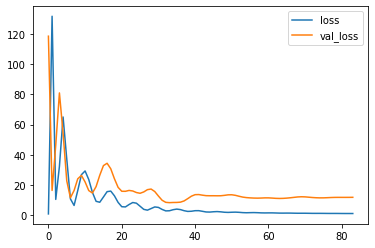

In [26]:
# validation_split eklendikten sonra çalıştır 
df = pd.DataFrame(history.history)
#df.head()

# validation_split eklendikten sonra, df.head()'e bakarsak
# train datası için metrics'leri tutuyor ve validation_split için tutuyor 

df[["loss","val_loss"]].plot() #ylim=[0,20]
# train datası git gide aşağı gidiyor ama validasyon datasında şuan çok belli olmuyor o da azalıyor gibi
# ama batch size'ı arttırırsak smooth bir graph çıkacağı için daha iyi yorumlayabiliriz 
# sanki hafif olarak bir yükselme var diyebiliriz validasyon datasında orası bizim için yeterli diyebiliriz, daha ideal bir yer gibi diyebiliriz


# -----callbacks eklendikten sonra-----
# epochs'u normalde 1000 demiştik ama 80'den sonra bir iyileşme olmuyor demek ki öğrenme durmuş oldu yani 80 iterasyon gitmiş oldu 
# overfitting olmamış olmadı

In [122]:
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)

print(r2_score(y_train,ypred_train),mean_squared_error(y_train,ypred_train))
print(r2_score(y_test,ypred_test),mean_squared_error(y_test,ypred_test))

# model parametrelerini arttırırsak negatif değerlere bile düşebiliyoruz 
# modeli gerektiğinden fazla complex hale getirirsek, weight değişeceği için negatif çıkabilir ama tekrar çalıştırırsak pozitif çıkabilir
# onun için grafiği inceleyeceğiz öğrenip öğrenmedi mi diye 
# global minimayı bulamamış olabiliriz 
# birkaç kez denedikten sonra daha iyi değerler bulabiliriz ama bunu graph üzerinde görebiliriz eğer azalıyor ise demek ki loss function
# model öğreniyor diyebiliriz 

# -----sigmoid ekledikten sonra non-linear fonksiyon-------
# train datası'nın sonucu daha iyi gözüküyor diyebiliriz 

# ------relu eklendikten sonra sabit bir öğrenme oluyor stabil-------
# daha iyi gözüküyor train ve test testi

0.9427459899512733 4.603824466847222
0.806625151942909 18.01361627339864


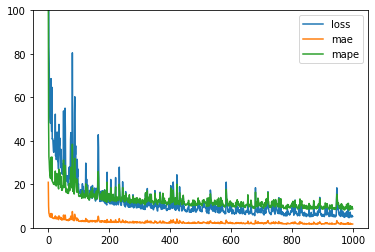

In [123]:
df = pd.DataFrame(history.history)
# df.plot()
# grafik olarakta çizdirebiliriz 
# ylim ile istersek scale edip 0 ile 100 arasını görebiliriz
df.plot(ylim = [0,100])
# loss'un azaldığını  yani aşağı doğru bir eğilim var ise öğrendiğini söyleyebiliriz 
# epochs'u 1000 yaparsak ise hala aşağı doğru bir eğilim var öğrendiğini anlayabiliriz 
# aşağı doğru bir eğilim var demek ki öğrenmeye devam ediyor, smooth bir eğilim var ise demek ki öğrenmiş diyeceğiz epochs sayısını arttırmayacağız
# ama öğrenmeye devam ediyorsa epochs sayısını arttırabiliriz 

# --- sigmoid ekledikten sonra -----
# graph'da da görülürse çok daha rahat öğreniyoruz diyebiliriz, çok daha smooth bir şekilde öğrenebiliyoruz
# non-linear'lik kattığımızda daha iyi öğrenebiliriz 

# ---- relu ekledikten sonra -----
# aşağı kısma doğru eğilim devam ediyor ama tam bir sonuç belirleyemiyoruz grafiğe baktıktan sonra hangi model bizim için daha iyi onu anlayacağız
# tensorflow'da malesef ki böyle  neural network'de hangi model daha iyi çalışır onu anca böyle anlayabiliyoruz, sonuca göre reçete uygulayacağız 
# epochs sayısını arttırma gibi veya hidden layer sayısını arttırma, graph'da tıkanma var ise eğer o sonucu gözlemleyip ona göre bir reçete uygulayabiliriz 

#------batch_size eklendikten sonra -------
# graph'da daha smooth bir şekil çıkıyor daha hızlı öğrenmiş diyebiliriz, ama neden batch-size'ı düşük alıyoruz
# çünkü memory'iyi yormamak için diyebiliriz, çok büyük datalara bakarsak, feature sayısı çok büyük diyelim ki 
# neural network architecture'larına bakarsak hesaplamalar çok uzun zaman alacak ve öğrenmem daha yavaş olacak
# batch_size = 32 olursa diyelim ufak ufak öğrenmeler ile daha hızlı öğrenmiş olacağız 
